# Import Libraries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

## Since the column names are missing so rename the columns to make them more understandable and Read the Dataset

In [189]:
headers = ['Date', 'Summary', 'Precip_type', 'Temp_C', 'App_Temp_C', 'Humidity', 
           'Wind_Speed_km/h', 'Wind_Direction_Degrees', 'Visibility_km', 'Pressure_millibars',
           'Daily_Summary']

df = pd.read_csv('Weather_History.csv', header=None, names=headers, low_memory=False)

## Stats of the data

In [18]:
df.describe()

,Temp_C,App_Temp_C,Humidity,Wind_Speed_km/h,Wind_Direction_Degrees,Visibility_km,Pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


## Observing a few rows of the dataset

In [54]:
df.head()

,Date,Summary,Precip_type,Temp_C,App_Temp_C,Humidity,Wind_Speed_km/h,Wind_Direction_Degrees,Visibility_km,Pressure_millibars,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.422220,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


## Checking the type of data present in the dataset

In [5]:
df.dtypes


Date                       object
Summary                    object
Precip_type                object
Temp_C                    float64
App_Temp_C                float64
Humidity                  float64
Wind_Speed_km/h           float64
Wind_Direction_Degrees      int64
Visibility_km             float64
Pressure_millibars        float64
Daily_Summary              object
dtype: object

## Round off the values to one decimal place for ease of use

In [191]:
df = df.round({'Temp_C' : 1, 'App_Temp_C' : 1, 'Humidity' : 1, 'Wind_Speed_km/h' : 1, 
          'Visibility_km' : 1, 'Pressure_millibars' : 1})

In [5]:
df.head()

,Date,Summary,Precip_type,Temp_C,App_Temp_C,Humidity,Wind_Speed_km/h,Wind_Direction_Degrees,Visibility_km,Pressure_millibars,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.4,7.4,0.9,14.1,251,15.8,1015.1,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.4,7.2,0.9,14.3,259,15.8,1015.6,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.4,9.4,0.9,3.9,204,15.0,1015.9,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.3,5.9,0.8,14.1,269,15.8,1016.4,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.8,7.0,0.8,11.0,259,15.8,1016.5,Partly cloudy throughout the day.


## Count of categories in the Summary feature

In [20]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

## Count of the missing values

In [9]:
df.isnull().sum()

Date                        0
Summary                     0
Precip_type               522
Temp_C                      0
App_Temp_C                  0
Humidity                    0
Wind_Speed_km/h             0
Wind_Direction_Degrees      0
Visibility_km               0
Pressure_millibars          0
Daily_Summary               0
dtype: int64

## Detecting missing values using a heatmap

In [1]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

NameError: name 'sns' is not defined

## Countplot for Precip type 

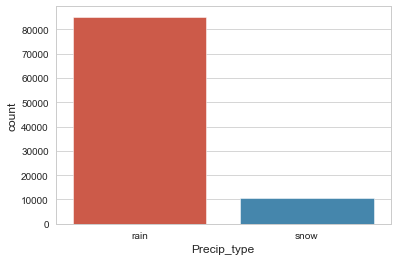

In [22]:
sns.set_style('whitegrid')
sns.countplot(x = 'Precip_type', data = df)

# Replacing null values in Precip_type with the most frequent value

In [192]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Precip_type'] = imputer.fit_transform(df[['Precip_type']])

df.Precip_type.isnull().sum()

0

# Distribution plot for App Temp

Text(0, 0.5, 'Frequency')

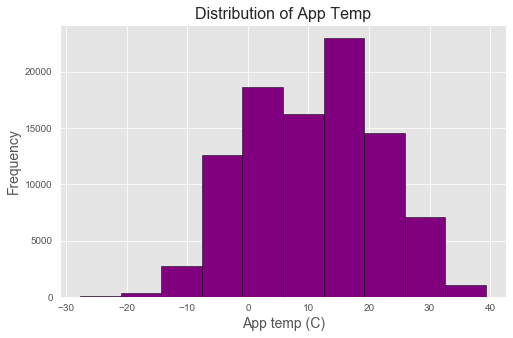

In [193]:
df.App_Temp_C.plot(kind='hist',color='purple',edgecolor='black',figsize=(8,5))

plt.title('Distribution of App Temp', size=16)

plt.xlabel('App temp (C)', size=14)

plt.ylabel('Frequency', size=14)

In [109]:
df.App_Temp_C.mean()

10.855028874173353

# Distribution plot for Temp

Text(0, 0.5, 'Frequency')

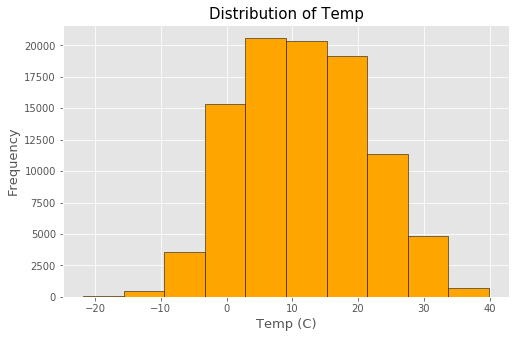

In [7]:
df.Temp_C.plot(kind='hist',color='orange',edgecolor='black',figsize=(8,5))

plt.title('Distribution of Temp', size=15)

plt.xlabel('Temp (C)', size=13)

plt.ylabel('Frequency', size=13)

In [107]:
df.Temp_C.mean()

11.932677919109635

## Distribution plot for Humidity

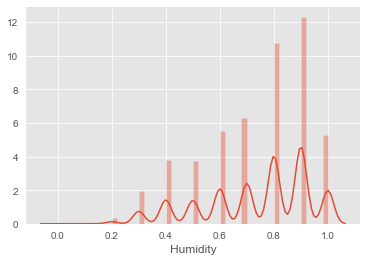

In [194]:
sns.distplot(df.Humidity.dropna())

In [10]:
df.Humidity.mean()

0.7348262884516326

# Histogram of Precip type (rain and snow)

Text(0, 0.5, 'Frequency')

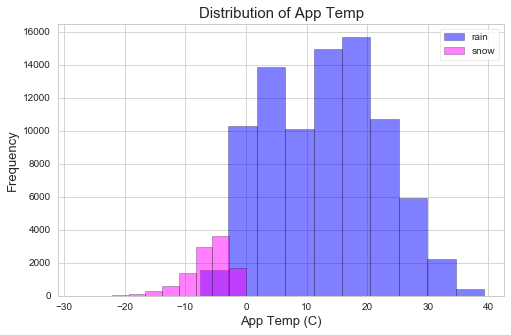

In [31]:
df[df['Precip_type']=='rain'].App_Temp_C.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(8,5))

df[df['Precip_type']=='snow'].App_Temp_C.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(8,5))

plt.legend(labels=['rain','snow'])

plt.title('Distribution of App Temp', size=15)

plt.xlabel('App Temp (C)', size=13)

plt.ylabel('Frequency', size=13)

## Histograms of features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A528AE8748>,
      dtype=object)

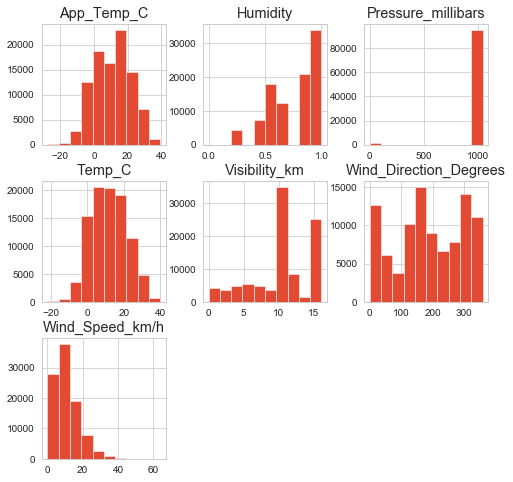

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
df.hist()

## Correlation of features

In [12]:
corr= df.corr()
corr

,Temp_C,App_Temp_C,Humidity,Wind_Speed_km/h,Wind_Direction_Degrees,Visibility_km,Pressure_millibars
Temp_C,1.000000,0.992623,-0.625184,0.008967,0.029972,0.393802,-0.005441
App_Temp_C,0.992623,1.000000,-0.595759,-0.056648,0.029017,0.382641,-0.000220
Humidity,-0.625184,-0.595759,1.000000,-0.223061,0.000057,-0.367504,0.006912
Wind_Speed_km/h,0.008967,-0.056648,-0.223061,1.000000,0.103799,0.100959,-0.049275
Wind_Direction_Degrees,0.029972,0.029017,0.000057,0.103799,1.000000,0.047602,-0.011652
Visibility_km,0.393802,0.382641,-0.367504,0.100959,0.047602,1.000000,0.059824
Pressure_millibars,-0.005441,-0.000220,0.006912,-0.049275,-0.011652,0.059824,1.000000


## Visualization of correlation using a heatmap

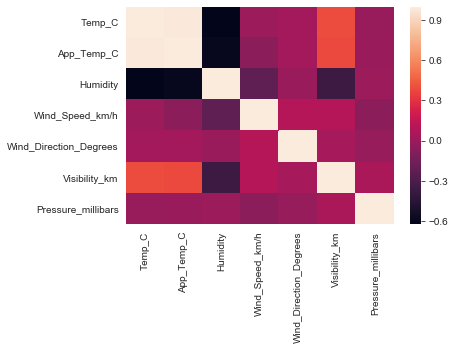

In [66]:
sns.heatmap(corr)

## Extracting those features that have a correlation > 0.1 with App Temp

In [32]:
corr['App_Temp_C'][abs(corr['App_Temp_C']) > 0.1]

Temp_C           0.992623
App_Temp_C       1.000000
Humidity        -0.595759
Visibility_km    0.382641
Name: App_Temp_C, dtype: float64

# Dropping the unwanted features

In [195]:
df = df.drop(columns = ['Wind_Speed_km/h', 'Wind_Direction_Degrees', 'Visibility_km', 'Pressure_millibars',
                  'Daily_Summary', 'Summary', 'Date'], axis = 1)

## Visual representation of App temp with Precip type

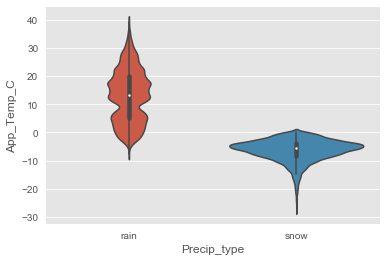

In [196]:
sns.violinplot(x = 'Precip_type', y = 'App_Temp_C', data = df)

## Visual representation of Humidity with Precip type

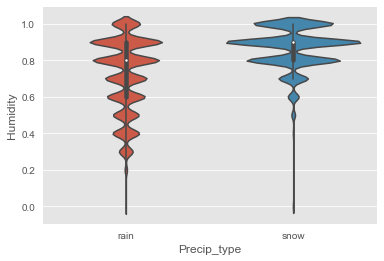

In [197]:
sns.violinplot(x = 'Precip_type', y = 'Humidity', data = df)

## Detecting outliers with a boxplot

Text(0.5, 1.0, 'Outliers')

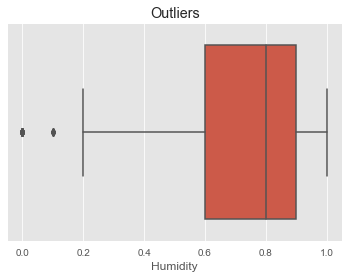

In [198]:
sns.boxplot(df.Humidity).set_title('Outliers')

## Removing outliers

Text(0.5, 1.0, 'Without_Outliers')

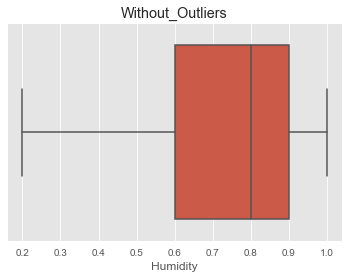

In [188]:
df = df[df.Humidity>=0.2]
sns.boxplot(df.Humidity).set_title('Without_Outliers')

## Relationship between AppTemp and Humidity 

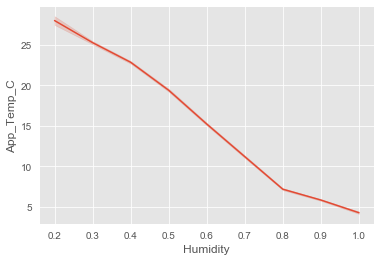

In [182]:
sns.lineplot(df.Humidity, df.App_Temp_C)

# Correlation between Temp and App Temp

Text(0, 0.5, 'App_Temp_C')

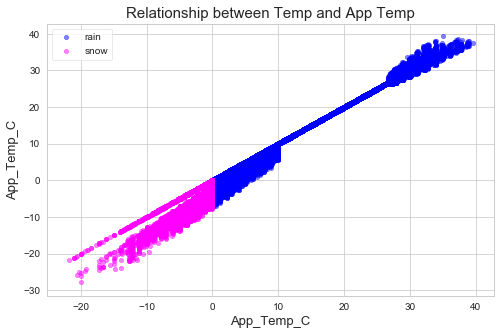

In [40]:
ax1= df[df['Precip_type']=='rain'].plot(kind='scatter', x='Temp_C',y='App_Temp_C', color='blue',alpha=0.5, figsize=(8,5))

df[df['Precip_type']=='snow'].plot(kind='scatter', x='Temp_C',y='App_Temp_C', color='magenta',alpha=0.5, figsize=(8,5),ax=ax1)

plt.legend(labels=['rain','snow'])

plt.title('Relationship between Temp and App Temp', size=15)

plt.xlabel('App_Temp_C', size=13)

plt.ylabel('App_Temp_C', size=13)

# Encoding Precip_type using One Hot Encoding

In [41]:
Dummies = pd.get_dummies(df.Precip_type)
Dummies.head()

,rain,snow
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


# Merging the two dataframes

In [42]:
merged = pd.concat([df, Dummies], axis = 'columns')
merged.head()

,Precip_type,Temp_C,App_Temp_C,Humidity,rain,snow
0,rain,9.4,7.4,0.9,1,0
1,rain,9.4,7.2,0.9,1,0
2,rain,9.4,9.4,0.9,1,0
3,rain,8.3,5.9,0.8,1,0
4,rain,8.8,7.0,0.8,1,0


# Dropping Precip_type and snow to avoid dummy variable trap

In [43]:
final = merged.drop(['Precip_type', 'snow'], axis = 'columns')
final.head()

,Temp_C,App_Temp_C,Humidity,rain
0,9.4,7.4,0.9,1
1,9.4,7.2,0.9,1
2,9.4,9.4,0.9,1
3,8.3,5.9,0.8,1
4,8.8,7.0,0.8,1


## Relationship between Temp and Humidity 

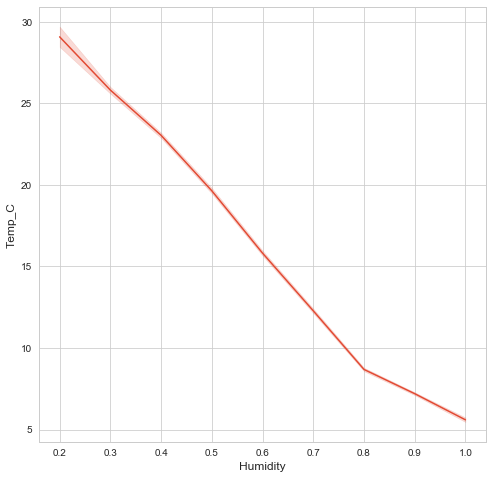

In [45]:
sns.lineplot(df.Humidity, df.Temp_C)

# Creating correlation matrix

In [46]:
cor = final.corr()
cor

,Temp_C,App_Temp_C,Humidity,rain
Temp_C,1.000000,0.992626,-0.628879,0.561902
App_Temp_C,0.992626,1.000000,-0.599387,0.564510
Humidity,-0.628879,-0.599387,1.000000,-0.233054
rain,0.561902,0.564510,-0.233054,1.000000


# To calculate VIF of each IV, we need to ignore the real DV and make each IV our target feature. Thus we perform Auxillary Regression for Temp_C

In [47]:
from sklearn.model_selection import train_test_split
feature_names = ['Humidity', 'rain']
X = final[feature_names]
y = final['Temp_C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
ytest_predict = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, ytest_predict)
print('r2 is', r2)
vif = 1 / (1 - r2)
print('vif is', vif)

r2 is 0.5783816949435683
vif is 2.371813528983649


# Auxillary Regression for Humidity

In [48]:
from sklearn.model_selection import train_test_split
feature_names = ['Temp_C', 'rain']
X = final[feature_names]
y = final['Humidity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
ytest_predict = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, ytest_predict)
print('r2 is', r2)
vif = 1 / (1 - r2)
print('vif is', vif)

r2 is 0.41764150724298077
vif is 1.7171553475004198


# Auxillary Regression for rain

In [49]:
from sklearn.model_selection import train_test_split
feature_names = ['Humidity', 'Temp_C']
X = final[feature_names]
y = final['rain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
ytest_predict = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, ytest_predict)
print('r2 is', r2)
vif = 1 / (1 - r2)
print('vif is', vif)

r2 is 0.33899432111876826
vif is 1.5128463066951625


# Since the VIF for all the 3 IVs is less than 5, we will keep them

# Applying Multiple Linear Regression

In [134]:
names = ['Humidity', 'Temp_C', 'rain']
X = final[names]
y = final['App_Temp_C']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
ytest_predict = model.predict(X_test)

# Calculating R2, MAE, MSE and RMSE

In [114]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, ytest_predict)
print('R2', R2)

from sklearn.metrics import mean_absolute_error 
print('Mean Absolute Error', mean_absolute_error(y_test, ytest_predict))

from sklearn.metrics import mean_squared_error
print('Mean Squared Error', mean_squared_error(y_test, ytest_predict))

from sklearn.metrics import mean_squared_error
print('Root Mean Square Error', np.sqrt(mean_squared_error(y_test, ytest_predict)))

R2 0.9862009724719316
Mean Absolute Error 0.9418751625432079
Mean Squared Error 1.5681980128532707
Root Mean Square Error 1.2522771310110516


# Finding training and test score

In [98]:
print('Training score', model.score(X_train, y_train))
print('Test score', model.score(X_test, y_test))

Training score 0.9863894140988932
Test score 0.9862009724719316


# Calculating coefficients and the intercept

In [106]:
print('Coefficients', model.coef_)
print('Intercept', model.intercept_)

Coefficients [2.20862289 1.13855738 0.11063391]
Intercept -4.453806834061668


# Regularization of the model using Cross Validation

In [109]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
print('Cross Validation Score', cross_val_score(model, X, y, cv = 900).mean())

Cross Validation Score 0.886048433220187


# Regression Equation and prediction of App Temp

In [ ]:
App_Temp_C = -4.404 + 2.194(Humidity) + 1.139(Temp_C) + 0.057(rain)
           = -4.404 + 2.194(0.9) + 1.139(9.4) + 0.057(1)
           = 8.347

In [118]:
predict = model.predict([[0.9, 9.4, 1]])
print('App Temp is', predict)

App Temp is [8.34702707]


# Predicting App Temp using only one IV i.e. Humidity

In [163]:
names = ['Humidity']
X = final[names]
y = final['App_Temp_C']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
ytest_predict = model.predict(X_test)

print('Coefficients', model.coef_)
print('Intercept', model.intercept_)

predict = model.predict([[0.9]])
print('App Temp is', predict)

Coefficients [-32.45392542]
Intercept 34.709806583644045
App Temp is [5.50127371]


# Linear regression using only Temp

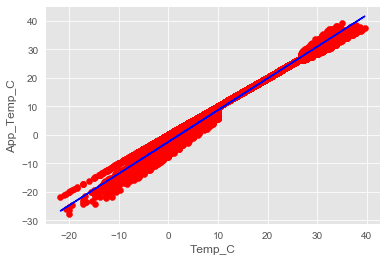

In [181]:
names = ['Temp_C']
X = final[names]
y = final['App_Temp_C']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
ytest_predict = model.predict(X_test)

plt.scatter(X_train,y_train, color='red')
plt.plot(X_train, model.predict(X_train),color='blue')
plt.xlabel('Temp_C')
plt.ylabel('App_Temp_C')
plt.show()
